In [1]:
import cv2

## Create Mandelbrot

$z_{{n+1}}={z_{n}}^{2}+c$

Treating the real and imaginary parts of c as image coordinates on the complex plane, pixels may then be coloured according to how soon the sequence crosses an arbitrarily chosen threshold (the threshold has to be at least 2, as -2 is the complex number with the largest magnitude within the set, but otherwise the threshold is arbitrary). If c is held constant and the initial value of z is varied instead, one obtains the corresponding Julia set for the point c.



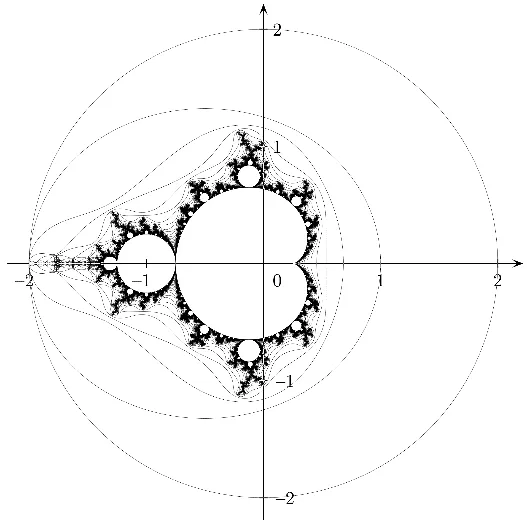

In [2]:
def mandel(c, z = 0, threshold = 2):
    """generator implementation. Turned out not super useful"""
    
    i=0
    
    while (abs(z) <= threshold) and (i<100):
        z = z**2 + c
        i += 1
        yield z, i   

In [3]:
import numpy as np

# define mandelbrot region of interest
x = np.linspace(-1, -0.5, 1000)
y = np.linspace(-0j, +0.5j, 1000)

# full coordindate arrays
xx, yy = np.meshgrid(x, y)

shape = (xx+yy).shape
result = np.zeros((xx+yy).flatten().shape)

# set max i, 100 is reasonable
max_i = 100

for j, c in enumerate((xx+yy).flatten()):

    z = 0
    i = 0

    while (abs(z) <= 2) and (i < max_i):
        z = z**2 + c
        i += 1
        
    result[j] = i
    
result = result.reshape(shape)

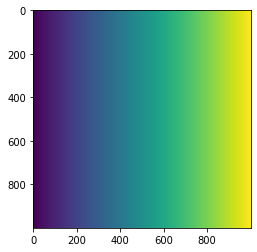

In [36]:
plt.imshow(xx)

In [51]:
result = np.zeros((3,3))
mask = np.array([[1, 0, 0],
               [0, 1, 0],
               [0, 0, 0]])
result += mask
result


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [65]:
result += mask
result
result[np.where(result > 1)] += 1

In [66]:
result

array([[15.,  0.,  0.],
       [ 0., 15.,  0.],
       [ 0.,  0.,  0.]])

In [64]:
np.where(result > 1)

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

In [70]:
plane = xx + yy
result = np.zeros(plane.shape)
mask = np.ones(plane.shape, dtype = int)

for i in range(100):    
    plane[mask] = np.square(plane[mask], 2) + c
    
    # get idcs where threshold not crossed
    mask = np.where(np.abs(plane) < 2)
    
    # add 1s to result
    result[mask] += 1

TypeError: return arrays must be of ArrayType

In [ ]:
plane[mask] = np.square(plane[mask]) + c


In [30]:
timeit.timeit("np.abs(2+0.5j)", setup = 'import numpy as np')

1.140680199999906

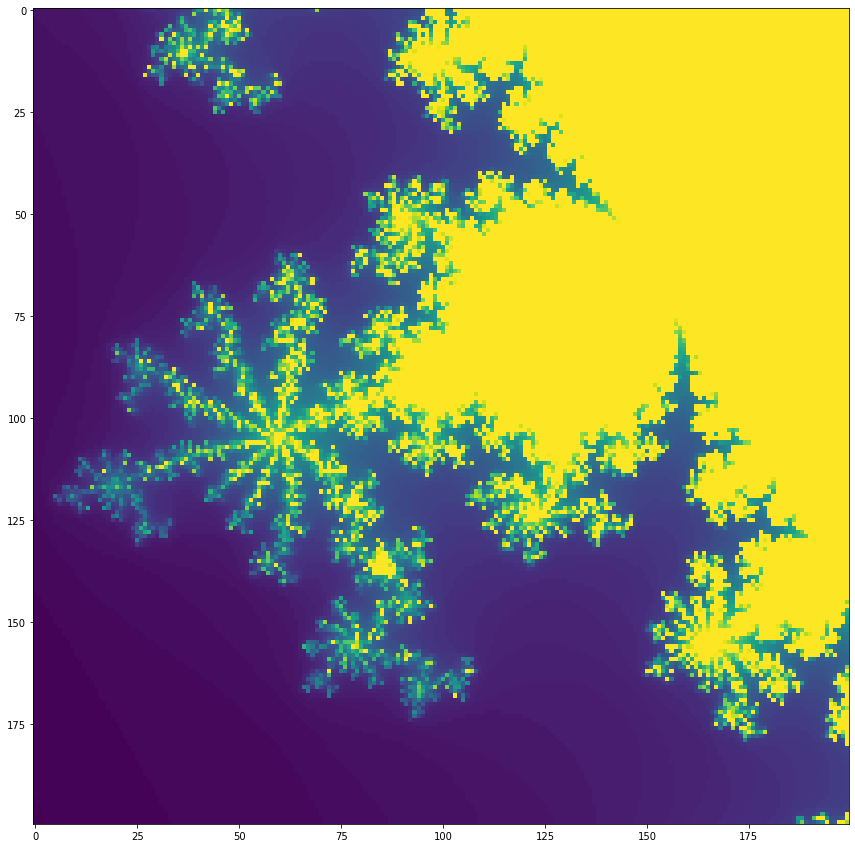

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 15))
plt.imshow(result[600:800, 525:725], cmap = 'viridis')

In [513]:
import cv2
import numpy as np

# create VideoCapture object
cap = cv2.VideoCapture('fractal_in.gif') # TODO put fractal video

if (cap.isOpened() == False):
    print('Error while trying to open video. Plese check again...')

# get the frame width and height
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# define codec and create VideoWriter object
out = cv2.VideoWriter('fractal_out.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (frame_width, frame_height))



Error while trying to open video. Plese check again...


[ERROR:0@8486.831] global /io/opencv/modules/videoio/src/cap.cpp (164) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.5) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): fractal_in.gif in function 'icvExtractPattern'


[ERROR:0@8486.833] global /io/opencv/modules/videoio/src/cap.cpp (595) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.5) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): fractal_out.avi in function 'icvExtractPattern'




In [ ]:
# read until end of video
while(cap.isOpened()):
    
    # capture each frame of the video
    ret, frame = cap.read()
    
    if ret == True:
    
        # add gaussian blurring to frame
        frame = cv2.GaussianBlur(frame, (5, 5), 0) # TODO adjust blurring here
        
        # save video frame
        out.write(frame)
        
        # display frame
        cv2.imshow('Video', frame)
        
        # press `q` to exit
        if cv2.waitKey(27) & 0xFF == ord('q'):
            break
    
    # if no frame found
    else:
        break

# release VideoCapture()
cap.release()

# close all frames and video windows
cv2.destroyAllWindows()